In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import mplcursors
import pandas_ta as pta
import numpy as np
import os 

In [2]:
file_paths = [os.path.join(os.getcwd(), "raw_data", file) for file in os.listdir("raw_data")]

In [3]:
file_path = [file for file in file_paths if file.endswith('TCS_data.csv')]
file_path

['c:\\Users\\arsha\\OneDrive\\Desktop\\Stockify_Development\\stockify\\Stockify\\raw_data\\TCS_data.csv']

In [31]:
import pandas as pd
import pandas_ta as pta
from pandas import DataFrame
import numpy as np
import matplotlib as plt
from datetime import datetime
from typing import Optional, Union
from matplotlib import pyplot as plt
import mplcursors
from datetime import datetime, timedelta
from matplotlib import dates as mpl_dates
import matplotlib.dates as mdates


In [16]:
TS=12
KS=24
SS=120
CS=24
OS=0


# In[8]:


def ichimoku_graph(Dataframe):
    Dataframe['TenkanSan']=pta.ichimoku(high=Dataframe['High'],low=Dataframe['Low'],close=Dataframe['Close'],tenkan=TS,kijun=KS,senkou=SS,include_chikou=True,offset=OS)[0]['ITS_12']
    Dataframe['Kijun']=pta.ichimoku(high=Dataframe['High'],low=Dataframe['Low'],close=Dataframe['Close'],tenkan=TS,kijun=KS,senkou=SS,include_chikou=True,offset=OS)[0]['IKS_24']
    Dataframe['SenkanA']=pta.ichimoku(high=Dataframe['High'],low=Dataframe['Low'],close=Dataframe['Close'],tenkan=TS,kijun=KS,senkou=SS,include_chikou=True,offset=OS)[0]['ISA_12']
    Dataframe['SenkanB']=pta.ichimoku(high=Dataframe['High'],low=Dataframe['Low'],close=Dataframe['Close'],tenkan=TS,kijun=KS,senkou=SS,include_chikou=True,offset=OS)[0]['ISB_24']
    Dataframe['Chinkou']=pta.ichimoku(high=Dataframe['High'],low=Dataframe['Low'],close=Dataframe['Close'],tenkan=TS,kijun=KS,senkou=SS,include_chikou=True,offset=OS)[0]['ICS_24']
    
    plt.style.use('seaborn')
    plt.figure(figsize=(14,7))
    days=500
    dates=Dataframe['Datetime'].tail(days)
    price=Dataframe['Close'].tail(days)
    TenkanSan=Dataframe['TenkanSan'].tail(days)
    Kijun=Dataframe['Kijun'].tail(days)
    Chinkou=Dataframe['Chinkou'].tail(days)
    SenkanA=Dataframe['SenkanA'].tail(days)
    SenkanB=Dataframe['SenkanB'].tail(days)


    fig, ax = plt.subplots()
    ax.plot_date(dates, price, linestyle='solid', linewidth=4, fmt='b', marker=None, label='TCS Stock Data')
    plt.plot(dates,TenkanSan,label='Tenkan Sen')
    ax.plot(dates,Kijun,label='Kijun Sen')
    ax.plot(dates,Chinkou,label='Chinkou',alpha=0.5)
    ax.plot(dates,SenkanA,label='SenkanA')
    ax.plot(dates,SenkanB,label='SenkanB')

    ax.fill_between(dates, SenkanA, SenkanB, where=(SenkanB>=SenkanA),color='red',alpha=0.15,label='Bearish')
    ax.fill_between(dates, SenkanA, SenkanB, where=(SenkanB<=SenkanA),color='green',alpha=0.15,label='Bullish')


    ax.xaxis.set_major_locator(mdates.MonthLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

    mplcursors.cursor(hover=True)

    plt.gcf().autofmt_xdate()
    plt.title("TCS Stock with Ichimoku Graph")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.legend(loc='upper right')


    plt.tight_layout()
    return 

In [17]:
def ichimoku_recommendation(Dataframe):
    def trade_condition(Dataframe):
            signal_position = []

            for i in range(len(Dataframe)):
                if (Dataframe['Close'][i] > Dataframe['TenkanSan'][i]) & (Dataframe['Close'][i] > Dataframe['Kijun'][i]):
                    signal_position.append('long')
                elif  (Dataframe['Close'][i] < Dataframe['TenkanSan'][i]) & (Dataframe['Close'][i] < Dataframe['Kijun'][i]):
                    signal_position.append('short')
                else:
                    signal_position.append('neutral')

            return signal_position
    Dataframe['position'] = trade_condition(Dataframe)
    
    def trade_crossover(Dataframe):
    
        long_crossover = []
        short_crossover = []

           
        marker = 0

        for i in range(len(Dataframe)):
            if Dataframe['TenkanSan'][i] > Dataframe['Kijun'][i]:
                if (marker != 1):
                    long_crossover.append(Dataframe['Close'][i])
                    short_crossover.append(np.NaN)
                    marker = 1
                
                else:
                    long_crossover.append(np.NaN)
                    short_crossover.append(np.NaN)

            elif Dataframe['TenkanSan'][i] < Dataframe['Kijun'][i]:
                if (marker != -1):
                    short_crossover.append(Dataframe['Close'][i])
                    long_crossover.append(np.NaN)
                    marker = -1
                
                else:
                    long_crossover.append(np.NaN)
                    short_crossover.append(np.NaN)
            else:
                long_crossover.append(np.NaN)
                short_crossover.append(np.NaN)


        return long_crossover, short_crossover
    crossover=trade_crossover(Dataframe)
    Dataframe['long_crossover']=crossover[0]
    Dataframe['short_crossover']=crossover[1]
    def create_signal(Dataframe):
        signal = []
        for i in range(len(Dataframe)):
            if pd.notnull(Dataframe['long_crossover'][i]) & (Dataframe['position'][i] == 'long'):
                signal.append('buy')
            elif pd.notnull(Dataframe['short_crossover'][i]) & (Dataframe['position'][i] == 'short'):
                signal.append('sell')
            else:
                signal.append('hold')

        return signal
    signal=create_signal(Dataframe)
    Dataframe['Signal']=signal
    df_cleaned = Dataframe.dropna(subset=['long_crossover'])
    print(df_cleaned[['Signal']].tail(1))



<Figure size 1400x700 with 0 Axes>

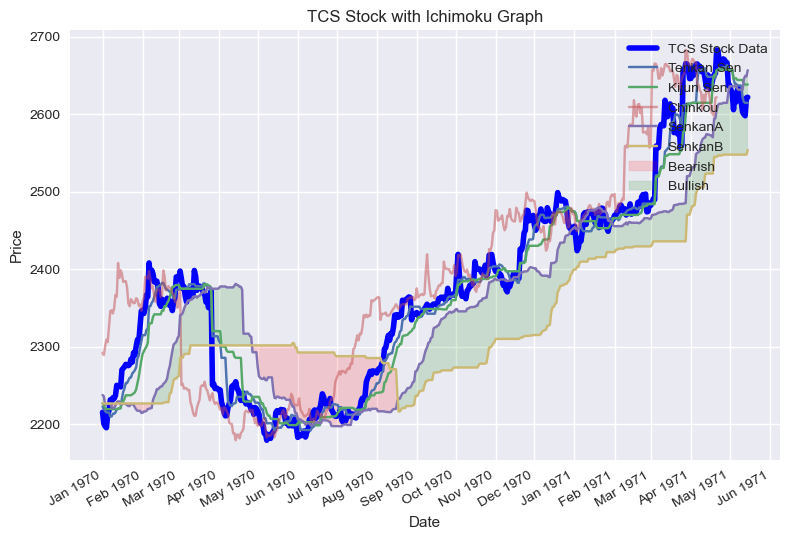

In [18]:
ichimoku_graph(Dataframe)

In [19]:

ichimoku_recommendation(Dataframe)

     Signal
1696    buy


In [8]:
from graph import TechnicalAnalysis

In [4]:
import os
file_paths = [os.path.join(os.getcwd(), "raw_data", file) for file in os.listdir("raw_data")]
file_path = [file for file in file_paths if file.endswith('TCS_data.csv')]
ta = TechnicalAnalysis(file_path)

In [27]:
def ichimoku_graph(self, dataframe, TS=12, KS=24, SS=120, CS=24, OS=0):
        
    
        dataframe['Datetime'] = pd.to_datetime(dataframe['Datetime']).dt.date
        dataframe['TenkanSan'] = pta.ichimoku(high=dataframe['High'], low=dataframe['Low'], close=dataframe['Close'], tenkan=TS, kijun=KS, senkou=SS, include_chikou=True, offset=OS)[0]['ITS_12']
        dataframe['Kijun'] = pta.ichimoku(high=dataframe['High'], low=dataframe['Low'], close=dataframe['Close'], tenkan=TS, kijun=KS, senkou=SS, include_chikou=True, offset=OS)[0]['IKS_24']
        dataframe['SenkanA'] = pta.ichimoku(high=dataframe['High'], low=dataframe['Low'], close=dataframe['Close'], tenkan=TS, kijun=KS, senkou=SS, include_chikou=True, offset=OS)[0]['ISA_12']
        dataframe['SenkanB'] = pta.ichimoku(high=dataframe['High'], low=dataframe['Low'], close=dataframe['Close'], tenkan=TS, kijun=KS, senkou=SS, include_chikou=True, offset=OS)[0]['ISB_24']
        dataframe['Chinkou'] = pta.ichimoku(high=dataframe['High'], low=dataframe['Low'], close=dataframe['Close'], tenkan=TS, kijun=KS, senkou=SS, include_chikou=True, offset=OS)[0]['ICS_24']
        fig = go.Figure()
        days = 500
        dates = dataframe['Datetime'].tail(days)
        candlestick = go.Candlestick(x=dates,open=dataframe['Open'].tail(days),high=dataframe['High'].tail(days),low=dataframe['Low'].tail(days),close=dataframe['Close'].tail(days),name='Candlestick')
        tenkan_sen = go.Scatter(x=dates, y=dataframe['TenkanSan'].tail(days),mode='lines',name='Tenkan Sen',line=dict(color='blue'))
        kijun_sen = go.Scatter(x=dates,y=dataframe['Kijun'].tail(days),mode='lines',name='Kijun Sen',line=dict(color='orange'))
        senkan_a = go.Scatter(x=dates,y=dataframe['SenkanA'].tail(days),mode='lines',name='Senkan A',line=dict(color='purple'))
        senkan_b = go.Scatter(x=dates,y=dataframe['SenkanB'].tail(days),mode='lines',name='Senkan B',line=dict(color='green'))
        Chinkou = go.Scatter(x=dates,y=dataframe['Chinkou'].tail(days),mode='lines',name='Chinkou',line=dict(color='grey'))
        
        fig.add_trace(candlestick)
        fig.add_trace(tenkan_sen)
        fig.add_trace(kijun_sen)
        fig.add_trace(senkan_a)
        fig.add_trace(senkan_b)
        fig.add_trace(Chinkou)
        fig.update_layout(title='Ichimoku Indicator', xaxis_title='Date',yaxis_title='Price',xaxis_rangeslider_visible=False)

        return fig
    
def ichimoku_recommendation(Dataframe):
        # Dataframe = self.dataframes.get(file_path)
        # if Dataframe is None:
        #     raise ValueError("File path not found.")
        Dataframe['Datetime'] = pd.to_datetime(Dataframe['Datetime']).dt.date
        Dataframe['TenkanSan'] = pta.ichimoku(high=Dataframe['High'], low=Dataframe['Low'], close=Dataframe['Close'], tenkan=TS, kijun=KS, senkou=SS, include_chikou=True, offset=OS)[0]['ITS_12']
        Dataframe['Kijun'] = pta.ichimoku(high=Dataframe['High'], low=Dataframe['Low'], close=Dataframe['Close'], tenkan=TS, kijun=KS, senkou=SS, include_chikou=True, offset=OS)[0]['IKS_24']
        Dataframe['SenkanA'] = pta.ichimoku(high=Dataframe['High'], low=Dataframe['Low'], close=Dataframe['Close'], tenkan=TS, kijun=KS, senkou=SS, include_chikou=True, offset=OS)[0]['ISA_12']
        Dataframe['SenkanB'] = pta.ichimoku(high=Dataframe['High'], low=Dataframe['Low'], close=Dataframe['Close'], tenkan=TS, kijun=KS, senkou=SS, include_chikou=True, offset=OS)[0]['ISB_24']
        Dataframe['Chinkou'] = pta.ichimoku(high=Dataframe['High'], low=Dataframe['Low'], close=Dataframe['Close'], tenkan=TS, kijun=KS, senkou=SS, include_chikou=True, offset=OS)[0]['ICS_24']
        
        def trade_condition(Dataframe):
                signal_position = []
                for i in range(len(Dataframe)):
                    if (Dataframe['Close'][i] > Dataframe['TenkanSan'][i]) & (Dataframe['Close'][i] > Dataframe['Kijun'][i]):
                        signal_position.append('long')
                    elif  (Dataframe['Close'][i] < Dataframe['TenkanSan'][i]) & (Dataframe['Close'][i] < Dataframe['Kijun'][i]):
                        signal_position.append('short')
                    else:
                        signal_position.append('neutral')

                return signal_position
        Dataframe['position'] = trade_condition(Dataframe)
        def trade_crossover(Dataframe):
            long_crossover = []
            short_crossover = []
            marker = 0

            for i in range(len(Dataframe)):
                if Dataframe['TenkanSan'][i] > Dataframe['Kijun'][i]:
                    if (marker != 1):
                        long_crossover.append(Dataframe['Close'][i])
                        short_crossover.append(np.NaN)
                        marker = 1
                    
                    else:
                        long_crossover.append(np.NaN)
                        short_crossover.append(np.NaN)

                elif Dataframe['TenkanSan'][i] < Dataframe['Kijun'][i]:
                    if (marker != -1):
                        short_crossover.append(Dataframe['Close'][i])
                        long_crossover.append(np.NaN)
                        marker = -1
                    
                    else:
                        long_crossover.append(np.NaN)
                        short_crossover.append(np.NaN)
                else:
                    long_crossover.append(np.NaN)
                    short_crossover.append(np.NaN)


            return long_crossover, short_crossover
        crossover=trade_crossover(Dataframe)
        Dataframe['long_crossover']=crossover[0]
        Dataframe['short_crossover']=crossover[1]
        def create_signal(Dataframe):
            signal = []
            for i in range(len(Dataframe)):
                if pd.notnull(Dataframe['long_crossover'][i]) & (Dataframe['position'][i] == 'long'):
                    signal.append('buy')
                elif pd.notnull(Dataframe['short_crossover'][i]) & (Dataframe['position'][i] == 'short'):
                    signal.append('sell')
                else:
                    signal.append('hold')

            return signal
        signal=create_signal(Dataframe)
        Dataframe['Signal']=signal
        df_cleaned = Dataframe.dropna(subset=['long_crossover'])
        
        return df_cleaned[['Signal']].tail(1)



In [28]:
import pandas as pd
Dataframe = pd.read_csv(r"C:\Users\arsha\OneDrive\Desktop\Stockify_Development\stockify\Stockify\raw_data\TCS_data.csv")

In [2]:
TechnicalAnalysis().ichimoku_recommendation(Dataframe)

TypeError: __init__() missing 1 required positional argument: 'file_paths'

In [1]:
from graph import TechnicalAnalysis